# Problema planteado

Se procesaron automáticamente cardiotocografías fetales (CTG) y se midieron las características de diagnóstico respectivas. Nos encontramos ante un problema de clasificación donde tenemos que precedir a partir de las diferentes características, el target asociado.

# Paquetes y librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.svm import SVC
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
plt.rcParams['image.cmap'] = "bwr"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

# Carga de datos y análisis descriptivo.

## Importación Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file = '/content/drive/MyDrive/Aprendizaje_Supervisado/ASI_casoPractico.csv'

In [ ]:
data = pd.read_csv(file, sep = ';')

In [ ]:
data = data.drop(["ID","b","e","DR"], axis = 1)

## Análisis descriptivo

In [ ]:
data

,LBE,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,Target
0,120,0,0,0,73,0.5,43,2.4,0,0,...,62,126,2,0,120,137,121,73,1,1
1,132,4,0,4,17,2.1,0,10.4,2,0,...,68,198,6,1,141,136,140,12,0,0
2,133,2,0,5,16,2.1,0,13.4,2,0,...,68,198,5,1,141,135,138,13,0,0
3,134,2,0,6,16,2.4,0,23.0,2,0,...,53,170,11,0,137,134,137,13,1,0
4,132,4,0,5,16,2.4,0,19.9,0,0,...,53,170,9,0,137,136,138,11,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140,0,0,6,79,0.2,25,7.2,0,0,...,137,177,4,0,153,150,152,2,0,1
2122,140,1,0,9,78,0.4,22,7.1,0,0,...,103,169,6,0,152,148,151,3,1,1
2123,140,1,0,7,79,0.4,20,6.1,0,0,...,103,170,5,0,153,148,152,4,1,1
2124,140,1,0,9,78,0.4,27,7.0,0,0,...,103,169,6,0,152,147,151,4,1,1


Se han registrado que no hay datos nulos 

In [ ]:
data.isnull().sum()

LBE         0
AC          0
FM          0
UC          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
DL          0
DS          0
DP          0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
Target      0
dtype: int64

El describe.transpose nos permite saber los datos de centralización, posición y algunas de las métricas más importantes.

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
LBE,2126.0,133.303857,9.840844,106.0,126.0,133.0,140.0,160.0
AC,2126.0,2.722484,3.560850,0.0,0.0,1.0,4.0,26.0
FM,2126.0,7.241298,37.125309,0.0,0.0,0.0,2.0,564.0
UC,2126.0,3.659925,2.847094,0.0,1.0,3.0,5.0,23.0
ASTV,2126.0,46.990122,17.192814,12.0,32.0,49.0,61.0,87.0
MSTV,2126.0,1.332785,0.883241,0.2,0.7,1.2,1.7,7.0
ALTV,2126.0,9.846660,18.396880,0.0,0.0,0.0,11.0,91.0
MLTV,2126.0,8.187629,5.628247,0.0,4.6,7.4,10.8,50.7
DL,2126.0,1.570085,2.499229,0.0,0.0,0.0,3.0,16.0
DS,2126.0,0.003293,0.057300,0.0,0.0,0.0,0.0,1.0


## Clasificación de variables según su tipo, cualitativa o cuantitativa discreta o continúa.

Con $data.info()$ ver tipo de datos para cada columna.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LBE       2126 non-null   int64  
 1   AC        2126 non-null   int64  
 2   FM        2126 non-null   int64  
 3   UC        2126 non-null   int64  
 4   ASTV      2126 non-null   int64  
 5   MSTV      2126 non-null   float64
 6   ALTV      2126 non-null   int64  
 7   MLTV      2126 non-null   float64
 8   DL        2126 non-null   int64  
 9   DS        2126 non-null   int64  
 10  DP        2126 non-null   int64  
 11  Width     2126 non-null   int64  
 12  Min       2126 non-null   int64  
 13  Max       2126 non-null   int64  
 14  Nmax      2126 non-null   int64  
 15  Nzeros    2126 non-null   int64  
 16  Mode      2126 non-null   int64  
 17  Mean      2126 non-null   int64  
 18  Median    2126 non-null   int64  
 19  Variance  2126 non-null   int64  
 20  Tendency  2126 non-null   int6

Para cada columna con $data.agg(['nunique']).T$ hemos visto la cantidad de respuestas para cada variable.

In [ ]:
data.agg(['nunique']).T

,nunique
LBE,48
AC,22
FM,96
UC,19
ASTV,75
MSTV,57
ALTV,87
MLTV,249
DL,15
DS,2


## Gráficas análisis descriptivo

Representación de los datos con diagramas de tarta (Target) e histogramas para ver como se distribuyen los datos.

In [ ]:
contador_ceros = 0
contador_unos = 0
contador_fallos = 0

for i in range(len(data['Target'])):
    if data['Target'][i] == 0:
        contador_ceros += 1
    elif data['Target'][i] == 1:
        contador_unos += 1
    else:
        contador_fallos += 1 

print(f'El número de estados fetales normales son : {contador_ceros} y su porcentaje es: {contador_ceros /(contador_ceros +contador_unos) * 100 } %')
print(f'El número de estados fetales anormales son : {contador_unos} y su porcentaje es: {contador_unos /(contador_ceros +contador_unos) * 100 } %')
print(f'El número de estados fetales con errores son : {contador_fallos}')

El número de estados fetales normales son : 1655 y su porcentaje es: 77.84571966133585 %
El número de estados fetales anormales son : 471 y su porcentaje es: 22.154280338664158 %
El número de estados fetales con errores son : 0


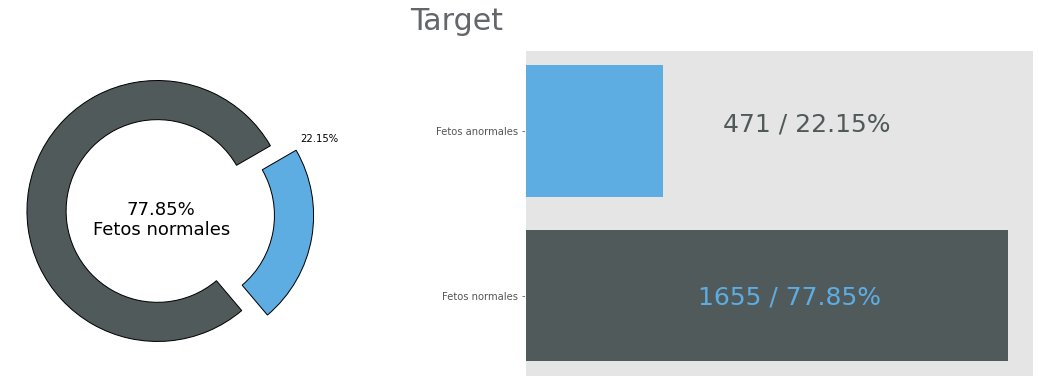

In [ ]:
fig = plt.figure(figsize = (20, 6))
plt.suptitle('Target', fontsize=30, color = '#63666A')

ax = plt.subplot(1, 2, 1)
wedgeprops = {'width':0.3, 'edgecolor':'black', 'linewidth':1}
ax.pie(data['Target'].value_counts(),
       wedgeprops=wedgeprops, 
       startangle=30, 
       colors=['#515A5A', '#5DADE2'],
       explode = (0.1, 0.1))
ax.text(-0.07, -0.05, 
        str((data[data['Target'] == 0]['Target'].count()/len(data['Target'])*100).round(2)) + "%\nFetos normales" ,
        ha='center', va='center', 
        fontsize=18, 
        color = 'black')
ax.text(1,0.55,str((data[data['Target'] == 1]['Target'].count()/len(data['Target'])*100).round(2)) + "%",color = 'black')

ax = plt.subplot(1, 2, 2)
ax.barh(['Fetos normales','Fetos anormales'], 
        data['Target'].value_counts(),
        color = ['#515A5A', '#5DADE2'])
ax.set_yticks([0,1])
ax.set_xticks([])
ax.grid(False)
ax.text(ax.patches[0].get_width()/2.8,
       -.05,
        str((data[data['Target'] == 0]['Target']).count()) + " / " +str((data[data['Target'] == 0]['Target'].count()/len(data['Target'])*100).round(2)) + "%",
        fontsize = 25,
        color = '#5DADE2')
ax.text(ax.patches[0].get_width()/2.45,
        1,
        str((data[data['Target'] == 1]['Target']).count()) + " / " +str((data[data['Target'] == 1]['Target'].count()/len(data['Target'])*100).round(2)) + "%",
        fontsize = 25,
        color = '#515A5A')

plt.show()

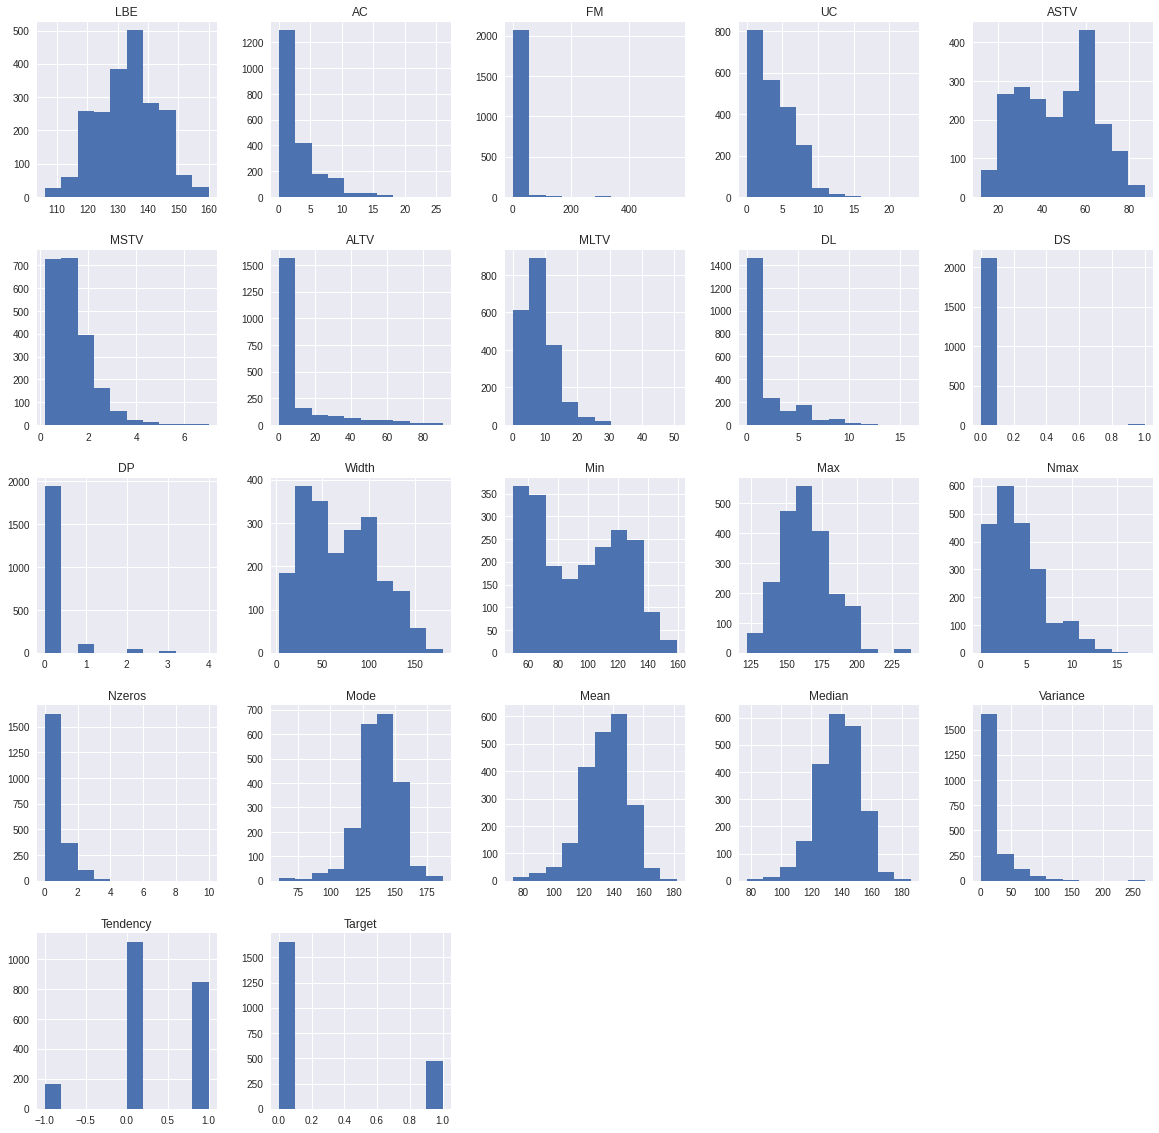

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(20,20))
plt.style.use("seaborn")
data.hist(ax=ax)
plt.show()

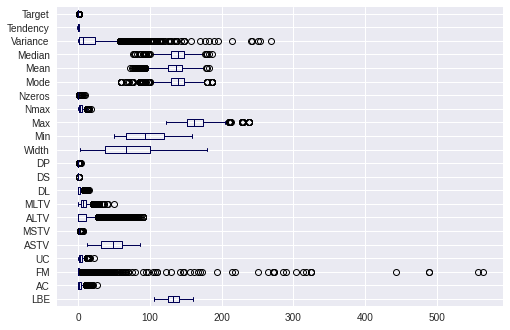

In [ ]:
data_box_plot = data.boxplot(vert=False, color = "#000054")

## Matriz de correlación

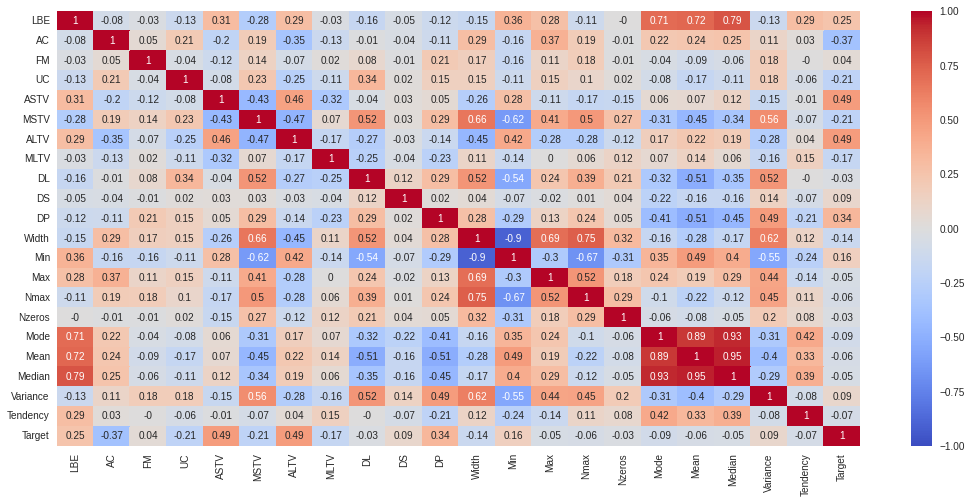

In [ ]:
data_corr = data.corr().round(2)
plt.figure(figsize=(18,8))
import seaborn as sns
sns.heatmap(data_corr , annot=True ,cmap ='coolwarm',vmin = -1 ,vmax =
1 ,center = 0)

# Muestreo. Conjunto de entrenamiento y test.


Creamos un conjunto de entrenamiento y otro de test a partir del conjunto inicial de datos
donde el conjunto de entrenamiento contenga el 70% de las observaciones (Posteriormente con el modelo que hemos implementado es el que da mejores parámetros).

En este caso vamos a utilizar todo el dataset, la variable dependiente va a ser Target y el
resto como variables independientes.

In [ ]:
from sklearn.model_selection import train_test_split
X = data.loc[:, data.columns != "Target"]
y = data.loc[:, data.columns == "Target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 15)
print('Cantidad de filas en el Dataset completo: {}'.format(data.shape[0]))
print('Cantidad de filas en el Dataset de Train: {}'.format(X_train.shape[0]))
print('Cantidad de filas en el Dataset de Test: {}'.format(X_test.shape[0]))

Cantidad de filas en el Dataset completo: 2126
Cantidad de filas en el Dataset de Train: 1488
Cantidad de filas en el Dataset de Test: 638


# Ajuste del algoritmo de Naive Bayes.

A partir del conjunto de entrenamiento ajuste un modelo a partir del algoritmo de Naive
Bayes. Empleamos Gaussian dado que la mayoría de variables predictoras son de tipo
cuantitativo continuo. Representamos las curvas ROC para ver el área para los datos de
train y de test (Apreciamos resultados 0.95 para train y 0.94 para test).

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
modelNB = gnb.fit(X_train, y_train.values.ravel())
y_train_pred_proba = modelNB.predict_proba(X_train)
y_test_pred_proba = modelNB.predict_proba(X_test)

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_proba[:, 1])
roc_auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_proba[:, 1])
roc_auc_test = auc(fpr_test, tpr_test)

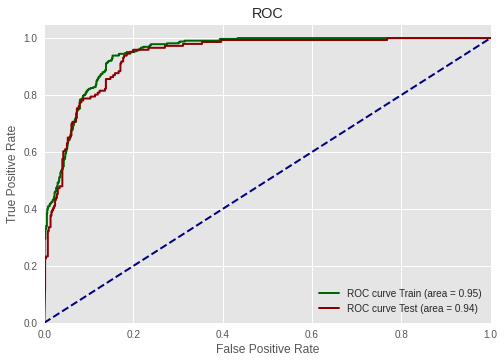

In [ ]:
plt.style.use('ggplot')
lw = 2
plt.plot(fpr_train,tpr_train,color="darkgreen",lw=lw,label="ROC curve Train (area = %0.2f)" % roc_auc_train,)
plt.plot(fpr_test,tpr_test,color="darkred",lw=lw,label="ROC curve Test (area = %0.2f)" % roc_auc_test,)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.legend(loc="lower right")
plt.show()

In [ ]:
y_train_pred = modelNB.predict(X_train)
y_test_pred = modelNB.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print("Classification report for training data:")
print(classification_report(y_train, y_train_pred))

print("Classification report for test data:")
print(classification_report(y_test, y_test_pred))

Classification report for training data:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1163
           1       0.78      0.56      0.65       325

    accuracy                           0.87      1488
   macro avg       0.83      0.76      0.78      1488
weighted avg       0.86      0.87      0.86      1488

Classification report for test data:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       492
           1       0.81      0.57      0.67       146

    accuracy                           0.87       638
   macro avg       0.84      0.76      0.79       638
weighted avg       0.86      0.87      0.86       638



# Ajuste del algoritmo de Support Vector Machine.

Lo ajusto con el modelo lineal y valores por defecto. Representamos las curvas ROC para ver el área para los datos de train y de test (Apreciamos resultados 0.97 para train y 0.96 para test).

In [ ]:
svmLineal = svm.SVC(C = 1
,kernel='linear'
,degree = 1
,probability = True)

svmLineal.fit(X_train, y_train)

SVC(C=1, degree=1, kernel='linear', probability=True)

In [ ]:
y_proba_train_svm = svmLineal.predict_proba(X_train)
y_proba_test_svm = svmLineal.predict_proba(X_test)

In [ ]:
fpr_train_svm, tpr_train_svm, _ = roc_curve(y_train, y_proba_train_svm[:, 1])
roc_auc_train_svm = auc(fpr_train_svm, tpr_train_svm)

fpr_test_svm, tpr_test_svm, _ = roc_curve(y_test, y_proba_test_svm[:,1])
roc_auc_test_svm = auc(fpr_test_svm, tpr_test_svm)

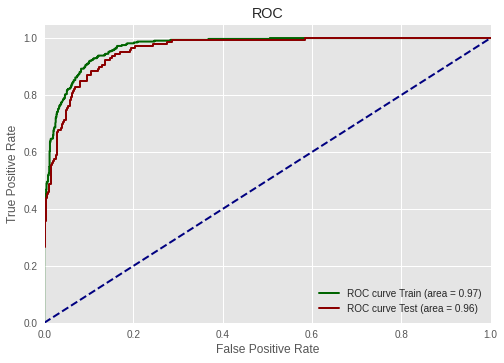

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr_train_svm,tpr_train_svm,color="darkgreen",lw=lw,label="ROC curve Train (area = %0.2f)" % roc_auc_train_svm,)
plt.plot(fpr_test_svm,tpr_test_svm,color="darkred",lw=lw,label="ROC curve Test (area = %0.2f)" % roc_auc_test_svm,)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.legend(loc="lower right")
plt.show()

In [ ]:
y_train_svm_pred = svmLineal.predict(X_train)
y_test_svm_pred = svmLineal.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print("Classification report for training data:")
print(classification_report(y_train, y_train_svm_pred))

print("Classification report for test data:")
print(classification_report(y_test, y_test_svm_pred))

Classification report for training data:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1163
           1       0.83      0.79      0.81       325

    accuracy                           0.92      1488
   macro avg       0.88      0.87      0.88      1488
weighted avg       0.92      0.92      0.92      1488

Classification report for test data:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       492
           1       0.80      0.78      0.79       146

    accuracy                           0.91       638
   macro avg       0.87      0.86      0.87       638
weighted avg       0.91      0.91      0.91       638



# Búsqueda de la mejor combinación de hiperparámetros en el algoritmo de SVM utilizando la función Grid Search de Scikit Learn. 

Creamos la malla, en mi caso he ido realizando diferentes pruebas antes de dejar estos parámetros.

In [ ]:
from sklearn.model_selection import GridSearchCV
 
param_grid = [
    {"kernel": ["rbf"], "gamma": [0,1e-3,1e-4], "C": [5,10,15,35]},
    {"kernel": ["linear"], "gamma": [0,1e-3,1e-4],"C": [1,5,6,10,15,35]},
    {"kernel": ["poly"], "gamma": [0,1e-3,1e-4], "C": [1,2,5,10], "degree": [2,3]},
]
 
grid = GridSearchCV(
        estimator  = SVC(),
        param_grid = param_grid, 
        scoring    = 'roc_auc',  
        n_jobs     = -1,
        cv         = 3, 
        verbose    = 0,
        return_train_score = True
      )


grid.fit(X = X_train, y = y_train)


resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False) \
    .head(10)

,param_C,param_gamma,param_kernel,param_degree,mean_test_score,std_test_score,mean_train_score,std_train_score
31,1,0.001,poly,2,0.967740,0.009517,0.983224,0.001816
11,35,0.0001,rbf,NaN,0.964868,0.002887,0.986407,0.001207
37,2,0.001,poly,2,0.964854,0.010229,0.985020,0.002144
8,15,0.0001,rbf,NaN,0.963130,0.003226,0.981027,0.001979
35,1,0.0001,poly,3,0.963031,0.009474,0.979701,0.002530
23,10,0.0001,linear,NaN,0.962986,0.001005,0.971209,0.001578
22,10,0.001,linear,NaN,0.962986,0.001005,0.971209,0.001578
21,10,0,linear,NaN,0.962986,0.001005,0.971209,0.001578
13,1,0.001,linear,NaN,0.962794,0.000294,0.971234,0.001457
14,1,0.0001,linear,NaN,0.962794,0.000294,0.971234,0.001457


In [ ]:
print(grid.best_params_)
 
print(grid.best_estimator_)

{'C': 1, 'degree': 2, 'gamma': 0.001, 'kernel': 'poly'}
SVC(C=1, degree=2, gamma=0.001, kernel='poly')


# Validación del algorimo escogido a partir de la curva ROC, el área bajo la curva, la matriz de confusión y la precisión. Evaluar si existe sobreajuste.

## Algoritmo 1 - Mejor opción "poly", hiperparámetros: C = 1, gamma = 0.001, degree = 2.

In [ ]:
from sklearn.model_selection import train_test_split

X = data.loc[:, data.columns != "Target"]
y = data.loc[:, data.columns == "Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [ ]:
modelo = SVC(C = 1, kernel = 'poly', degree = 2, gamma = 0.001)
modelo.fit(X_train, y_train)

SVC(C=1, degree=2, gamma=0.001, kernel='poly')

In [ ]:
predicciones_train = modelo.predict(X_train)
predicciones_test = modelo.predict(X_test)

Con accuracy_score calculamos la precisión del modelo para el conjunto de entrenamiento y de test. 

Por otro lado, la matriz de confusión para el conjunto de test.

In [ ]:
accuracy = accuracy_score(y_true = y_train,y_pred = predicciones_train,normalize = True)
print(f"El accuracy de training es: {100*accuracy}%")

accuracy = accuracy_score(y_true = y_test,y_pred = predicciones_test,normalize = True)
print(f"El accuracy de test es: {100*accuracy}%")

confusion_matrix = pd.crosstab(
    y_test.Target.ravel(),
    predicciones_test,
    rownames=['Real'],
    colnames=['Predicción']
)
print(confusion_matrix)

El accuracy de training es: 94.42204301075269%
El accuracy de test es: 93.10344827586206%
Predicción    0    1
Real                
0           472   25
1            19  122


In [ ]:
svmRbf = svm.SVC(C = 1
                    ,kernel='poly'
                    ,gamma = 0.001
                    ,degree = 2
                    ,probability = True) 


svmRbf.fit(X_train, y_train)


y_proba_train_svm = svmRbf.predict_proba(X_train)
y_proba_test_svm = svmRbf.predict_proba(X_test)

In [ ]:

fpr_train_svm, tpr_train_svm, _ = roc_curve(y_train, y_proba_train_svm[:, 1])
roc_auc_train_svm = auc(fpr_train_svm, tpr_train_svm)


fpr_test_svm, tpr_test_svm, _ = roc_curve(y_test, y_proba_test_svm[:, 1])
roc_auc_test_svm = auc(fpr_test_svm, tpr_test_svm)

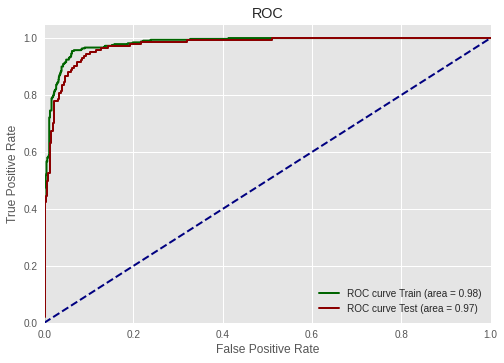

In [ ]:
plt.figure()
lw = 2

plt.plot(fpr_train_svm,tpr_train_svm,color="darkgreen",lw=lw,label="ROC curve Train (area = %0.2f)" % roc_auc_train_svm,)
plt.plot(fpr_test_svm,tpr_test_svm,color="darkred",lw=lw,label="ROC curve Test (area = %0.2f)" % roc_auc_test_svm,)

plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.legend(loc="lower right")
plt.show()

In [ ]:
y_train_svm_pred = svmRbf.predict(X_train)
y_test_svm_pred = svmRbf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print("Classification report for training data:")
print(classification_report(y_train, y_train_svm_pred))

print("Classification report for test data:")
print(classification_report(y_test, y_test_svm_pred))

Classification report for training data:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1158
           1       0.87      0.88      0.87       330

    accuracy                           0.94      1488
   macro avg       0.92      0.92      0.92      1488
weighted avg       0.94      0.94      0.94      1488

Classification report for test data:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       497
           1       0.83      0.87      0.85       141

    accuracy                           0.93       638
   macro avg       0.90      0.91      0.90       638
weighted avg       0.93      0.93      0.93       638



## Algoritmo 2 - Mejor opción "rbf", hiperparámetros: C = 35, gamma = 0.0001.

In [ ]:
from sklearn.model_selection import train_test_split

X = data.loc[:, data.columns != "Target"]
y = data.loc[:, data.columns == "Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [ ]:
modelo = SVC(C = 35, kernel = 'rbf', gamma = 0.0001)
modelo.fit(X_train, y_train)

SVC(C=35, gamma=0.0001)

In [ ]:
predicciones_train = modelo.predict(X_train)
predicciones_test = modelo.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_true = y_train,y_pred = predicciones_train,normalize = True)
print(f"El accuracy de training es: {100*accuracy}%")

accuracy = accuracy_score(y_true = y_test,y_pred = predicciones_test,normalize = True)
print(f"El accuracy de test es: {100*accuracy}%")

confusion_matrix = pd.crosstab(
    y_test.Target.ravel(),
    predicciones_test,
    rownames=['Real'],
    colnames=['Predicción']
)
print(confusion_matrix)

El accuracy de training es: 95.22849462365592%
El accuracy de test es: 92.31974921630093%
Predicción    0    1
Real                
0           480   22
1            27  109


In [ ]:
svmRbf = svm.SVC(C = 35
                    ,kernel='rbf'
                    ,gamma = 0.0001
                    ,probability = True) 

svmRbf.fit(X_train, y_train)

y_proba_train_svm = svmRbf.predict_proba(X_train)
y_proba_test_svm = svmRbf.predict_proba(X_test)

In [ ]:
fpr_train_svm, tpr_train_svm, _ = roc_curve(y_train, y_proba_train_svm[:, 1])
roc_auc_train_svm = auc(fpr_train_svm, tpr_train_svm)

fpr_test_svm, tpr_test_svm, _ = roc_curve(y_test, y_proba_test_svm[:, 1])
roc_auc_test_svm = auc(fpr_test_svm, tpr_test_svm)

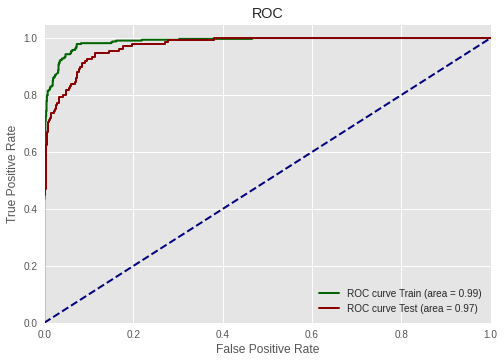

In [ ]:
plt.figure()
lw = 2

plt.plot(fpr_train_svm,tpr_train_svm,color="darkgreen",lw=lw,label="ROC curve Train (area = %0.2f)" % roc_auc_train_svm,)
plt.plot(fpr_test_svm,tpr_test_svm,color="darkred",lw=lw,label="ROC curve Test (area = %0.2f)" % roc_auc_test_svm,)

plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.legend(loc="lower right")
plt.show()

In [ ]:
y_train_svm_pred = svmRbf.predict(X_train)
y_test_svm_pred = svmRbf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print("Classification report for training data:")
print(classification_report(y_train, y_train_svm_pred))

print("Classification report for test data:")
print(classification_report(y_test, y_test_svm_pred))

Classification report for training data:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1153
           1       0.89      0.90      0.89       335

    accuracy                           0.95      1488
   macro avg       0.93      0.93      0.93      1488
weighted avg       0.95      0.95      0.95      1488

Classification report for test data:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       502
           1       0.83      0.80      0.82       136

    accuracy                           0.92       638
   macro avg       0.89      0.88      0.88       638
weighted avg       0.92      0.92      0.92       638



# Conclusion

El objetivo de esta trabajo sería implementar un algoritmo que pueda predecir de la manera más satisfactoria posible la variable Target.

---

Se puede apreciar que Naive Bayes se obtiene para train y test (0.95 y 0.94) se realiza de manera rápida, computacionalmente no tiene altos requerimientos, pero no alcanza los ratios de clasificación que se consiguen con SVM dando para test y train (0.97 y 0.96) y mucho menos después de realizar una optimización de los hiperparámetros a partir de la malla que permite la función Grid Search. 

El mejor modelo con poly, hiperparámetros: C = 1, gamma = 0.001, degree = 2.

El mejor modelo con rbf, hiperparámetros: C = 35, gamma = 0.0001.

---

A nivel de implementación como módelo creo que puede ser útil, más optimizado que Naive Bayes o SVM por defecto. 

A nivel clínico, los falsos negativos puede representar un mayor problema que un falso positivo debido a que se pretende utilizar este modelo para llevar a cabo medidas correctivas para ayudar a la supervivencia de los neonatos.